# Notebook to run the full selection using the new data loader class

##### Import the data loader

In [1]:
# Import the data loader
%load_ext autoreload
%autoreload 2
import data_loading as dl
from importlib import reload
reload(dl)
import pandas as pd

##### Import the selection algorithms and plotter objects

In [2]:
from unblinding_far_sideband import *
import localSettings as ls
import plotter

##### Load the data and create the plotter object

In [3]:
# Remove the load_lee flag to disable adding the LEE prediction
RUN = 1
samples,weights,data_pot = dl.load_run(run_number=RUN,data="bnb",loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True,loadsystematics=True,load_lee=True)
pl = plotter.Plotter(samples,weights,data_pot)

/uboone/app/users/cthorpe/RefactoredPELEE/data_loading.py:1015: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
/uboone/app/users/cthorpe/RefactoredPELEE/data_loading.py:1015: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
/uboone/app/users/cthorpe/RefactoredPELEE/data_loading.py:534: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/RefactoredPELEE/data_loading.py:534: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs

Loading lee sample


/uboone/app/users/cthorpe/RefactoredPELEE/plotter.py:290: UserWarning: Missing dirt sample
  warnings.warn("Missing dirt sample")


##### Draw the plot!

reco_e 18 (0.01, 2.5) Reconstructed Energy [ GeV ]


/uboone/app/users/cthorpe/RefactoredPELEE/plotter.py:316: RuntimeWarning: divide by zero encountered in true_divide
  return (data-mc)**2 / data
/uboone/app/users/cthorpe/RefactoredPELEE/plotter.py:508: RuntimeWarning: divide by zero encountered in true_divide
  ERR_STAT = 3. / ( 1./data + 2./mc )


(0.0, 7.011138725784916)

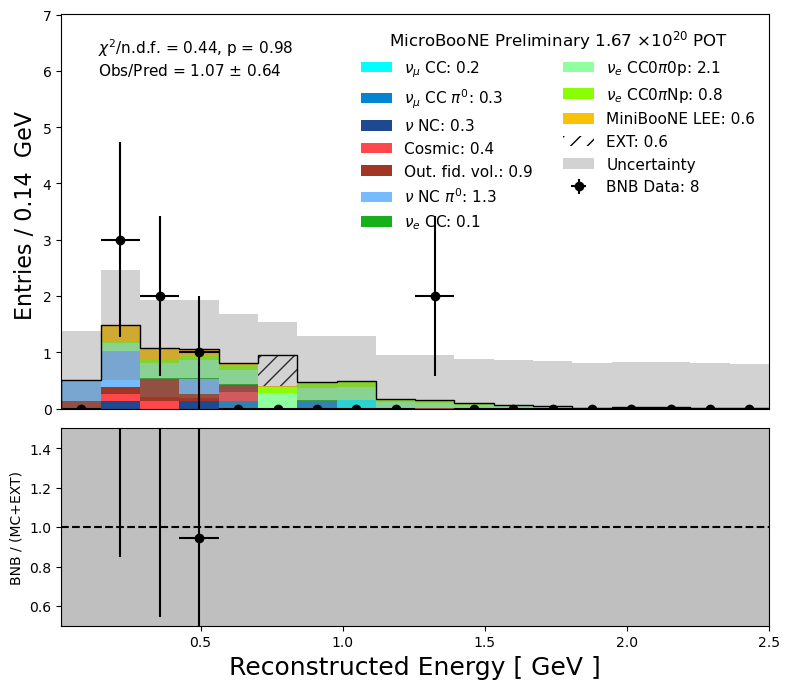

In [4]:
# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'ZP'
sel_key = 'ZPBDT'
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_key = 'NPBDTAllShr' #'None' 'NPVLAllShr' 'NPLAllShr' 'NPBDTAllShr' 'NPTAllShr'
run = RUN

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}


QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

#QUERY += ' and (bnbdata==0 or reco_e>0.85)'
#QUERY += ' and (bnbdata==0)'
#print(QUERY)
        
#formatting can be improved..
TITLE = ""
#for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
#    if text is None: continue
#    TITLE += text

# Reproducing Alex's plot
VARIABLE, BINS, RANGE, XTIT = 'reco_e',18,(0.01, 2.50),r"Reconstructed Energy [ GeV ]"

print(VARIABLE, BINS, RANGE, XTIT)

fig, ax1, ax2 = pl.plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="event_category",
    #kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
    ratio=True,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=True,
    draw_data=True
    #asymErrs=True
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)